In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y = True)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

clf_1 = linear_model.LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_1.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


In [4]:
clf = linear_model.LogisticRegression()
cv_scores = cross_val_score(clf, X, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Mean cross-validation score (5-fold): 0.951


In [5]:
param_range = [0.01,0.09,0.1,0.5]
train_scores, test_scores = validation_curve(linear_model.Lasso(), X, y,
                                            param_name='alpha',
                                            param_range=param_range, cv=5)

In [6]:
print(train_scores)
print(test_scores)

[[ 0.69460507  0.68626034  0.6813297   0.68016187  0.7025127 ]
 [ 0.68347271  0.66966215  0.65727241  0.66171933  0.68197961]
 [ 0.68291661  0.66926769  0.65679305  0.66126498  0.68151839]
 [ 0.63413096  0.62086967  0.61149629  0.61753698  0.63044691]]
[[ 0.51906194  0.67669899  0.73273416  0.66770141  0.55093812]
 [ 0.48874541  0.6472226   0.71723029  0.66388136  0.54482089]
 [ 0.48630614  0.6463169   0.71757605  0.66314102  0.54641253]
 [ 0.37998942  0.57334752  0.70217432  0.60991171  0.54676867]]


<IPython.core.display.Javascript object>


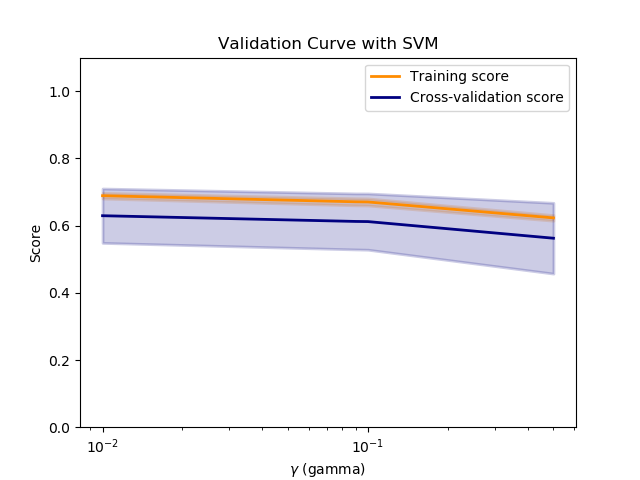

In [7]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()